# Departure - Arrival Matrix Report | Spain Provinces

#### Load libraries

In [1]:
import os
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

## Load data

### Load basemap

In [2]:
basemap_path = os.path.join("..", "raw", "Spain")
data_path = os.path.join("..", "data")

Load Spain provinces

In [6]:
provinces = gpd.read_file(os.path.join(basemap_path, "Region", "provinciales_etrs89.shp"))
provinces[["NAMEUNIT", "geometry"]].head()

,NAMEUNIT,geometry
0,València/Valencia,"MULTIPOLYGON (((-1.20715 40.00183, -1.21662 40..."
1,Toledo,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
2,Teruel,"POLYGON ((0.14135 40.71847, 0.13427 40.71928, ..."
3,Tarragona,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
4,Soria,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."


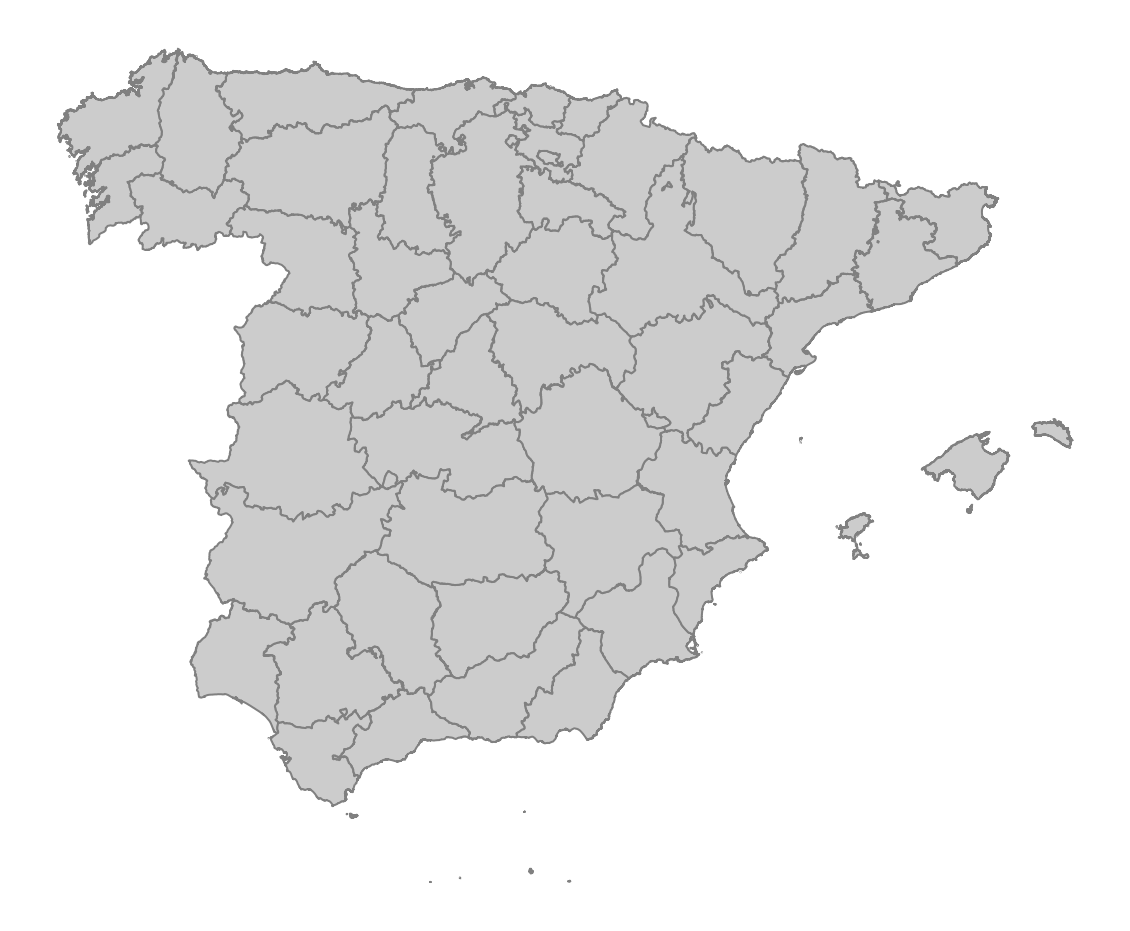

In [9]:
ax = provinces.to_crs(epsg=3857).plot(
    figsize=(20,20),
    color="#CCCCCC",
    edgecolor="gray",
    linewidth=2
)
ax.set_axis_off()
plt.show()

## Load data

In [11]:
data = pd.read_csv(os.path.join(data_path, "mod_provinces_spain.csv"))
data.head()

,dep_date,dep_timeframe,dep_geo_id,arr_date,arr_timeframe,arr_geo_id,bus,car,city_train,long_distance_train,on_foot,plane,subway,tram,total
0,2020-07-19,0:00 - 0:30,Bizkaia,2020-07-19,0:00 - 0:30,Bizkaia,0,0,0,0,1,0,0,0,1
1,2020-07-19,0:00 - 0:30,Bizkaia,2020-07-19,0:30 - 1:00,Bizkaia,0,0,0,0,1,0,0,0,1
2,2020-07-19,0:00 - 0:30,Castelló/Castellón,2020-07-19,0:00 - 0:30,Castelló/Castellón,0,1,0,0,0,0,0,0,1
3,2020-07-19,0:00 - 0:30,Guadalajara,2020-07-19,0:00 - 0:30,Guadalajara,0,1,0,0,0,0,0,0,1
4,2020-07-19,0:00 - 0:30,Guadalajara,2020-07-19,0:30 - 1:00,Madrid,0,1,0,0,0,0,0,0,1


In [13]:
# Generate departure dataframe
dep_df = data[['dep_date', 'dep_timeframe', 'dep_geo_id', 
               'bus', 'car', 'city_train', 'long_distance_train', 'on_foot', 'plane', 'subway', 'tram', 'total']]
dep_df = dep_df.rename(columns={
    'dep_date': 'date', 
    'dep_timeframe': 'timeframe', 
    'dep_geo_id': 'geo_id', 
})
dep_df.head()

,date,timeframe,geo_id,bus,car,city_train,long_distance_train,on_foot,plane,subway,tram,total
0,2020-07-19,0:00 - 0:30,Bizkaia,0,0,0,0,1,0,0,0,1
1,2020-07-19,0:00 - 0:30,Bizkaia,0,0,0,0,1,0,0,0,1
2,2020-07-19,0:00 - 0:30,Castelló/Castellón,0,1,0,0,0,0,0,0,1
3,2020-07-19,0:00 - 0:30,Guadalajara,0,1,0,0,0,0,0,0,1
4,2020-07-19,0:00 - 0:30,Guadalajara,0,1,0,0,0,0,0,0,1


## Perform calculations

### Trips from and to a province

In [75]:
province = 'Madrid'

#### From one to anywhere

In [76]:
# Conditions
departure_mad = data['dep_geo_id'] == province
arrival_not_mad = data['arr_geo_id'] != province

# Aggregation
mad_departure_agg = data[departure_mad & arrival_not_mad].groupby(['arr_geo_id']).sum()
mad_departure_agg

,bus,car,city_train,long_distance_train,on_foot,plane,subway,tram,total
arr_geo_id,,,,,,,,,
Alacant/Alicante,0,0,0,0,1,0,0,0,1
Albacete,0,2,0,0,0,0,0,0,2
Almería,0,0,0,0,1,0,0,0,1
Asturias,0,2,0,0,0,0,0,0,2
Badajoz,0,1,0,0,0,0,0,0,1
Barcelona,0,1,0,0,1,0,0,0,2
Burgos,0,1,0,0,1,0,0,0,2
Cuenca,0,2,0,0,0,0,0,0,2
Cádiz,0,3,0,1,0,0,0,0,4


Join data to provinces and create a choropleth map

In [74]:
# Prepare geodataframe for join
mad_departure_provinces = provinces.rename(columns={'NAMEUNIT': 'arr_geo_id'})

# Left join on arr_geo_id
mad_departure_joined = pd.merge(mad_departure_provinces, mad_departure_agg, how="left", on="arr_geo_id")

# Remove NaN
filter_nan = ~mad_departure_joined['total'].isin([np.nan])
mad_departure_prepared = mad_departure_joined[filter_nan][['arr_geo_id', 'geometry', 'total']]
mad_departure_prepared.head()

,arr_geo_id,geometry,total
0,València/Valencia,"MULTIPOLYGON (((-1.20715 40.00183, -1.21662 40...",1.0
1,Toledo,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884...",7.0
3,Tarragona,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6...",1.0
4,Soria,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646...",1.0
5,Sevilla,"POLYGON ((-5.94134 36.85192, -5.94659 36.85232...",2.0


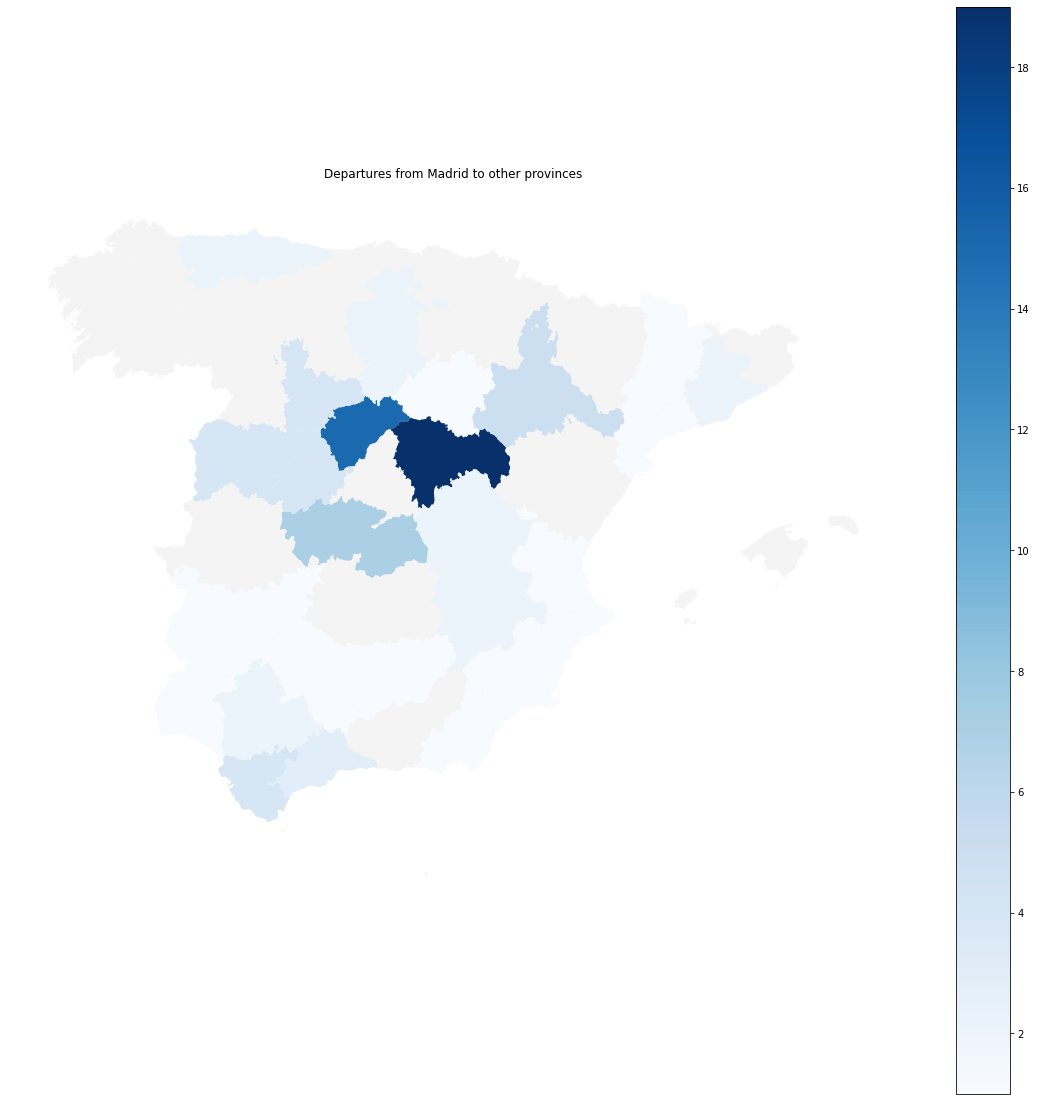

In [81]:
# Spain Provinces basemap
ax = provinces.to_crs(epsg=3857).plot(
    figsize=(20,20),
    color="#CCCCCC",
    alpha=0.2
)
ax.set_axis_off()

mad_departure_prepared.to_crs(epsg=3857).plot(
    ax=ax,
    figsize=(20,20),
    legend=True,
    column='total', cmap='Blues'
)

title = f'Departures from {province} to other provinces'
plt.title(title)
plt.show()

#### From anywhere to one

In [77]:
# Conditions
departure_not_mad = data['dep_geo_id'] != province
arrival_mad = data['arr_geo_id'] == province

# Aggregation
mad_arrival_agg = data[departure_not_mad & arrival_mad].groupby(['dep_geo_id']).sum()
mad_arrival_agg

,bus,car,city_train,long_distance_train,on_foot,plane,subway,tram,total
dep_geo_id,,,,,,,,,
Alacant/Alicante,0,1,0,0,2,0,0,0,3
Asturias,0,1,0,0,0,0,0,0,1
Barcelona,0,1,0,0,0,0,0,0,1
Burgos,0,1,0,0,0,2,0,0,3
Cantabria,0,0,0,0,2,0,0,0,2
Ciudad Real,0,4,0,0,0,0,0,0,4
Cuenca,0,5,0,0,1,0,0,0,6
Cádiz,0,5,0,0,1,0,0,0,6
Córdoba,0,1,0,0,0,0,0,0,1


In [78]:
# Prepare geodataframe for join
mad_arrival_provinces = provinces.rename(columns={'NAMEUNIT': 'dep_geo_id'})

# Left join on arr_geo_id
mad_arrival_joined = pd.merge(mad_arrival_provinces, mad_arrival_agg, how="left", on="dep_geo_id")

# Remove NaN
filter_nan = ~mad_arrival_joined['total'].isin([np.nan])
mad_arrival_prepared = mad_arrival_joined[filter_nan][['dep_geo_id', 'geometry', 'total']]
mad_arrival_prepared.head()

,dep_geo_id,geometry,total
0,València/Valencia,"MULTIPOLYGON (((-1.20715 40.00183, -1.21662 40...",3.0
1,Toledo,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884...",6.0
4,Soria,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646...",2.0
6,Segovia,"POLYGON ((-3.94497 40.90333, -3.94752 40.90051...",9.0
7,Cantabria,"MULTIPOLYGON (((-3.30454 43.25826, -3.29325 43...",2.0


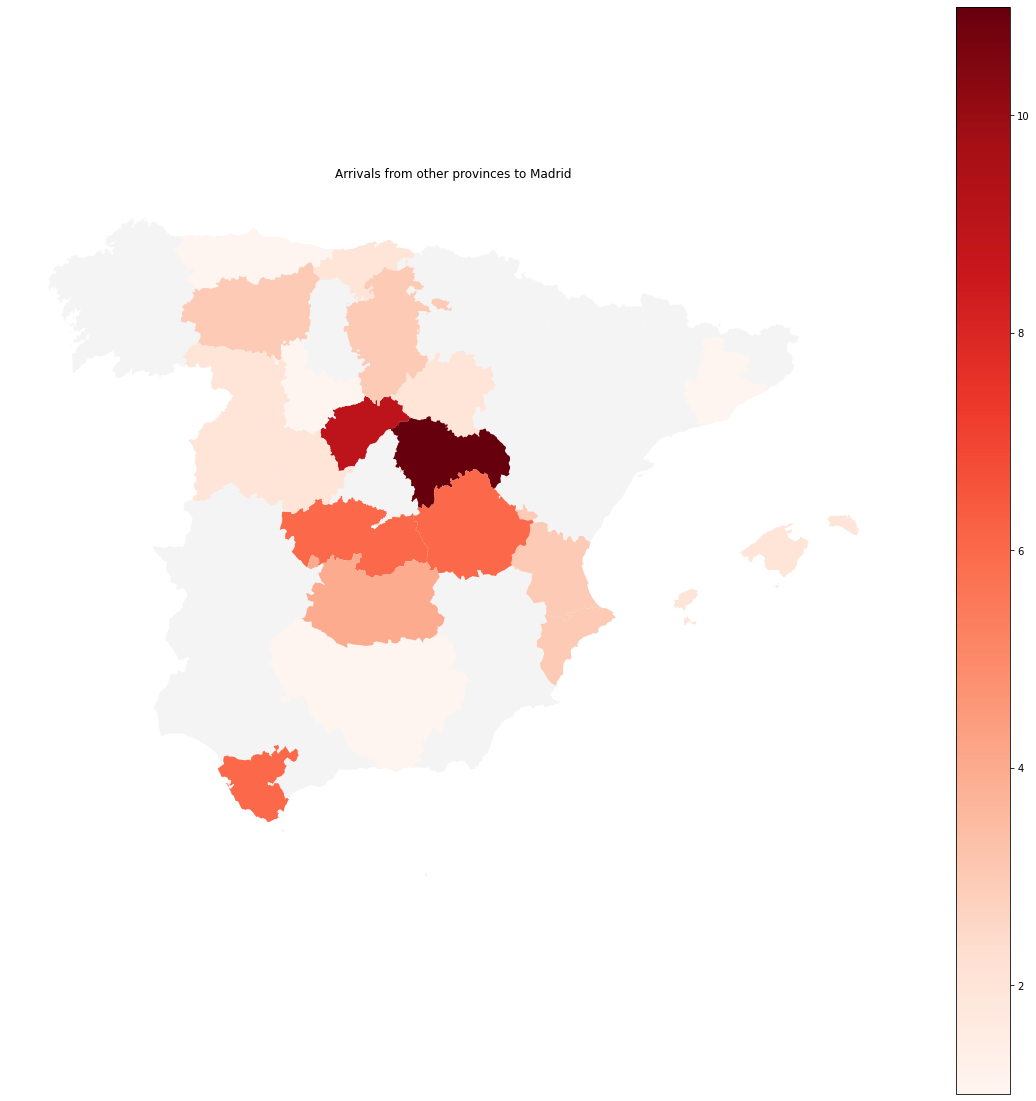

In [87]:
# Spain Provinces basemap
ax = provinces.to_crs(epsg=3857).plot(
    figsize=(20,20),
    color="#CCCCCC",
    alpha=0.2
)
ax.set_axis_off()

mad_arrival_prepared.to_crs(epsg=3857).plot(
    ax=ax,
    figsize=(20,20),
    legend=True,
    column='total', cmap='Reds'
)

title = f'Arrivals from other provinces to {province}'
plt.title(title)
plt.show()